# 💠Hypothesis testing💠

In [1]:
import numpy as np
import pandas as pd

## 1] CHI-SQUARE TEST

## 💠Creating the data table

In [2]:
data={
'Satisfaction':['Very Satisfied','Satisfied','Neutral','Unsatisfied','Very Unsatisfied'],
'Smart Thermostat':[50,80,60,30,20],
'Smart Light':[70,100,90,50,50]    
}

data=pd.DataFrame(data).set_index('Satisfaction')
data['Total_row']=[data['Smart Thermostat'][x]+data['Smart Light'][x] for x in range(5)]
data

,Smart Thermostat,Smart Light,Total_row
Satisfaction,,,
Very Satisfied,50,70,120
Satisfied,80,100,180
Neutral,60,90,150
Unsatisfied,30,50,80
Very Unsatisfied,20,50,70


## 💠Define the Hypothesis

#### H0 : There is no association between the type of smart home device purchased and the customer satisfaction level.

#### H1 : There is association between the type of smart home device purchased and the customer satisfaction level.

In [3]:
H0 = 'There is no association between the type of smart home device purchased and the customer satisfaction level.'
H1 = 'There is association between the type of smart home device purchased and the customer satisfaction level.'

## 💠Calculating Expected Values

#### Expexted values = Row_total * Column_total/Overall_total

In [4]:
Expected_values={
'Satisfaction':['Very Satisfied','Satisfied','Neutral','Unsatisfied','Very Unsatisfied'],
'Smart Thermostat':[(data['Smart Thermostat'].sum()*data['Total_row'][x])/data['Total_row'].sum() for x in range(5)],
'Smart Light':[(data['Smart Light'].sum()*data['Total_row'][x])/data['Total_row'].sum() for x in range(5)]
}
Expected_values=pd.DataFrame(Expected_values).set_index('Satisfaction')
Expected_values

,Smart Thermostat,Smart Light
Satisfaction,,
Very Satisfied,48.0,72.0
Satisfied,72.0,108.0
Neutral,60.0,90.0
Unsatisfied,32.0,48.0
Very Unsatisfied,28.0,42.0


## 💠 Calculating : (Original_value - Expected_value)**2/Expected_value

In [5]:
O_E={
'Satisfaction':['Very Satisfied','Satisfied','Neutral','Unsatisfied','Very Unsatisfied'],
'Smart Thermostat':[(data['Smart Thermostat'][x]-Expected_values['Smart Thermostat'][x])**2/Expected_values['Smart Thermostat'][x] for x in range(5)],
'Smart Light':[(data['Smart Light'][x]-Expected_values['Smart Light'][x])**2/Expected_values['Smart Light'][x] for x in range(5)]
}
O_E=pd.DataFrame(O_E).set_index('Satisfaction')
O_E['Total_row']=[O_E['Smart Thermostat'][x]+O_E['Smart Light'][x] for x in range(5)]
O_E

,Smart Thermostat,Smart Light,Total_row
Satisfaction,,,
Very Satisfied,0.083333,0.055556,0.138889
Satisfied,0.888889,0.592593,1.481481
Neutral,0.000000,0.000000,0.000000
Unsatisfied,0.125000,0.083333,0.208333
Very Unsatisfied,2.285714,1.523810,3.809524


## 💠Chi-Square value & Critical value

In [6]:
X2=O_E['Total_row'].sum()
print('Test Statistic X2 = ',X2)

Test Statistic X2 =  5.638227513227513


In [7]:
Degrees_of_freedom=(data.shape[0]-1)*((data.shape[1]-1)-1)
alpha=0.05

print('Degrees of freedom = ',Degrees_of_freedom)
print('Significance level (alpha) = 0.05 ')

Degrees of freedom =  4
Significance level (alpha) = 0.05 


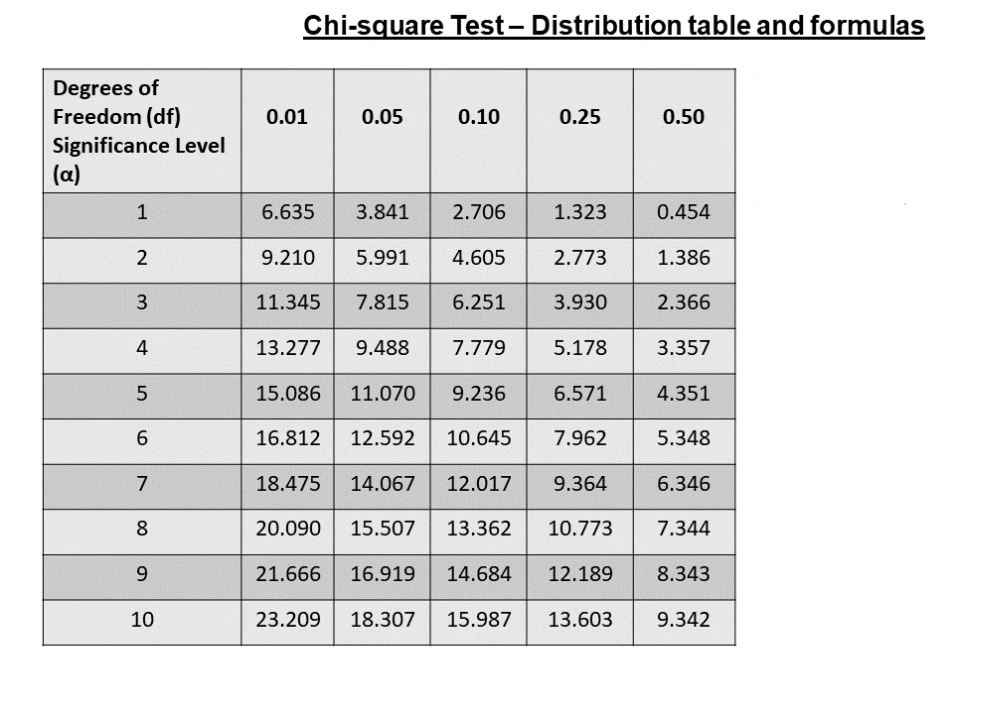

## 💠Conclusion :
###  🚩There is no association between the type of smart home device purchased and the customer satisfaction level.

In [8]:
Critical_value=9.488

if(X2>=Critical_value):
    print('Reject the null hypothesis \n ',f'💠{H0}')
else:
    print('Accept the null hypothesis \n',f'💠{H0}')

Accept the null hypothesis 
 💠There is no association between the type of smart home device purchased and the customer satisfaction level.


## 💠Using Python Library: scipy

In [9]:
from scipy.stats import chi2_contingency

data=[[50,80,60,30,20],[70,100,90,50,50]]

X2=chi2_contingency(data)[0]
p=chi2_contingency(data)[1]

if (p <= alpha):
    print('Reject the null hypothesis \n',f'💠{H0}')
else:
    print('Accept the null hypothesis \n ',f'💠{H0}')

Accept the null hypothesis 
  💠There is no association between the type of smart home device purchased and the customer satisfaction level.


# ________________________________________________________________

## 2] HYPOTHESIS TESTING

## 💠Data Provided

In [10]:
x=3050            #Sample mean
n=25              #Sample size
X=600             #Number of units produced in a week
W=1000+5*X        #Theoretical population mean
Std=5*25          #POpulation Standard deviation(25 units)

## 💠State the Hypotheses statement : Right-tailed test 

#### H0=The weekly operating costs are not higher than the model suggests.
#### H1=The weekly operating costs are higher than the model suggests.

In [11]:
H0='The weekly operating costs are not higher than the model suggests.' #i.e. Costs are equal or less as suggested by model
H1='The weekly operating costs are higher than the model suggests.'

## 💠Calculate the Test Statistic

In [12]:
z=(x-W)/(Std/n**0.5)
print('z-calculated is ',z)

z-calculated is  -38.0


## 💠Determine the Critical Value

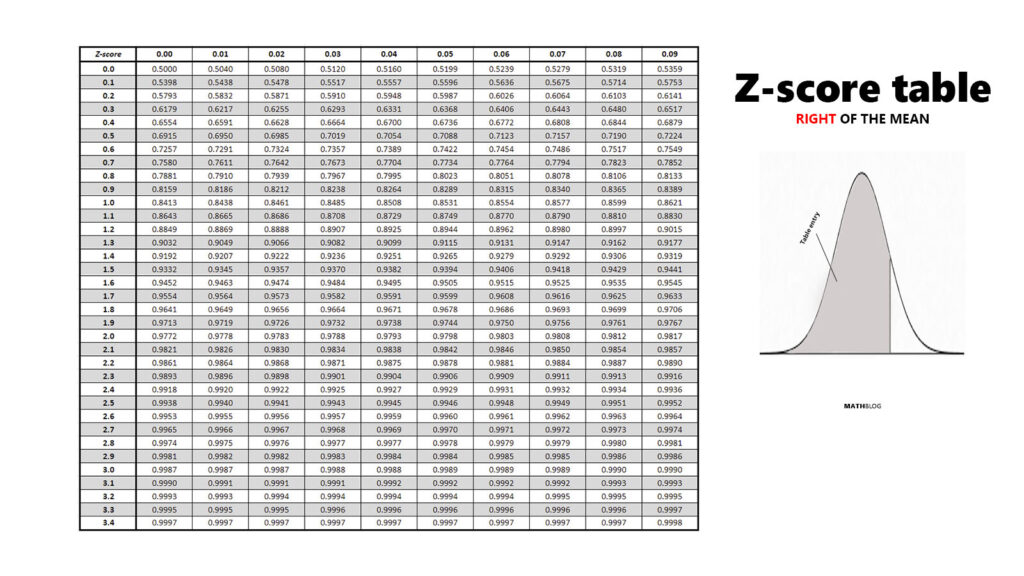

In [13]:
Alpha=0.05     #Checking value for 0.95= (1-Alpha)
Z_score=1.64

## 💠Conclusion :
###  🚩The weekly operating costs are not higher than the model suggests.

In [14]:
if (z <= Z_score):
    print('Accept the null hypothesis \n',f'💠{H0}')
else:
    print('Reject the null hypothesis \n ',f'💠{H0}')

Accept the null hypothesis 
 💠The weekly operating costs are not higher than the model suggests.


## 💠Using Python Library: statsmodels

In [15]:
from statsmodels.stats.weightstats import ztest